<a href="https://colab.research.google.com/github/garden-bell/computational_physics/blob/main/Computational_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import math
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# 최대 출력 열 수 조정 (예: 50열)
pd.set_option('display.max_columns', 200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# CSV 파일에서 데이터 불러오기
divorce_rate = pd.read_csv('data/divorce_rate.csv', header=None)
higher_education = pd.read_csv('data/higher_education.csv', header=None)
housing_prices = pd.read_csv('data/housing_prices.csv', header=None)
inflation_rate = pd.read_csv('data/inflation_rate.csv', header=None)
women_employment = pd.read_csv('data/women_employment.csv', header=None)
birth_rate = pd.read_csv('data/birth_rate.csv', header=None)

# 데이터 합치기 위해 값으로 변경
divorce_rate = divorce_rate.values.tolist()
higher_education = higher_education.values.tolist()
housing_prices = housing_prices.values.tolist()
inflation_rate = inflation_rate.values.tolist()
women_employment = women_employment.values.tolist()
birth_rate = birth_rate.values.tolist()

In [34]:
data = []
for i in range(len(divorce_rate)):
  for j in range(len(divorce_rate[i])):
    data.append([divorce_rate[i][j], higher_education[i][j], housing_prices[i][j], inflation_rate[i][j], women_employment[i][j], birth_rate[i][j]])

for i in range(len(data)) :
    for j in range(len(data[i])) :
        if math.isnan(data[i][j]) :
            via = 1
            while math.isnan(data[i + via][j]) and not(i + via == len(data)) :
                via += 1
            if (via + i == len(data)) :
                pass
            else :
                data[i][j] = data[i + via][j]


df = pd.DataFrame(data)

df.columns = ['divorce_rate', 'higher_education', 'housing_prices', 'inflation_rate', 'women_employment', 'birth_rate']

In [35]:
# 특성과 목표 변수 분리
X = df[['divorce_rate', 'higher_education', 'housing_prices', 'inflation_rate', 'women_employment']]
y = df['birth_rate']

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# 모델 구축
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))   # 입력층과 첫 번째 히든 레이어
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))   # 두 번째 히든 레이어
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))   # 세 번째 히든 레이어
model.add(Dropout(0.2))
model.add(Dense(1))   # 출력층

In [37]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
98/98 [==============================] - 3s 11ms/step - loss: 2.5806 - val_loss: 0.8927
Epoch 2/100
98/98 [==============================] - 1s 8ms/step - loss: 0.9553 - val_loss: 0.5963
Epoch 3/100
98/98 [==============================] - 1s 6ms/step - loss: 0.9736 - val_loss: 0.5982
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.8500 - val_loss: 0.5773
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 0.7610 - val_loss: 0.4816
Epoch 6/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6710 - val_loss: 0.4974
Epoch 7/100
98/98 [==============================] - 1s 8ms/step - loss: 0.7411 - val_loss: 0.4818
Epoch 8/100
98/98 [==============================] - 2s 18ms/step - loss: 0.6730 - val_loss: 0.4415
Epoch 9/100
98/98 [==============================] - 1s 13ms/step - loss: 0.6853 - val_loss: 0.4781
Epoch 10/100
98/98 [==============================] - 1s 9ms/step - loss: 0.6390 - val_loss: 0.4772
Epoch 

In [38]:
# 한국 데이터 불러오기
divorce_rate_korea = pd.read_csv('data/divorce_rate_korea.csv', header=None)
higher_education_korea = pd.read_csv('data/higher_education_korea.csv', header=None)
housing_prices_korea = pd.read_csv('datahousing_prices_korea.csv', header=None)
inflation_rate_korea = pd.read_csv('data/inflation_rate_korea.csv', header=None)
women_employment_korea = pd.read_csv('data/women_employment_korea.csv', header=None)

# 데이터 합치기 위해 값으로 변경
divorce_rate_korea = divorce_rate_korea.values.tolist()
higher_education_korea = higher_education_korea.values.tolist()
housing_prices_korea = housing_prices_korea.values.tolist()
inflation_rate_korea = inflation_rate_korea.values.tolist()
women_employment_korea = women_employment_korea.values.tolist()

data = []
for i in range(len(divorce_rate_korea)):
  for j in range(len(divorce_rate_korea[i])):
    data.append([divorce_rate_korea[i][j], higher_education_korea[i][j], housing_prices_korea[i][j], inflation_rate_korea[i][j], women_employment_korea[i][j]])

df = pd.DataFrame(data)

df.columns = ['divorce_rate', 'higher_education', 'housing_prices', 'inflation_rate', 'women_employment']

In [39]:
# 한국 데이터 스케일링
korea_data_scaled = scaler.transform(df[['divorce_rate', 'higher_education', 'housing_prices', 'inflation_rate', 'women_employment']])

# 예측 수행
birth_rate_korea_pred = model.predict(korea_data_scaled)

print(birth_rate_korea_pred)

# 연도별 예측 결과 출력
for year, pred in zip(range(2013, 2023), birth_rate_korea_pred):
    print(f'{year}년 예측된 한국의 출산율: {pred[0]}')

1/1 [==============================] - 0s 79ms/step
[[1.8245453]
 [1.8265612]
 [1.8386674]
 [1.8472446]
 [1.8573998]
 [1.860585 ]
 [1.8396518]
 [1.8693657]
 [1.9006064]
 [1.9689531]]
2013년 예측된 한국의 출산율: 1.8245452642440796
2014년 예측된 한국의 출산율: 1.8265612125396729
2015년 예측된 한국의 출산율: 1.838667392730713
2016년 예측된 한국의 출산율: 1.8472446203231812
2017년 예측된 한국의 출산율: 1.857399821281433
2018년 예측된 한국의 출산율: 1.8605849742889404
2019년 예측된 한국의 출산율: 1.8396518230438232
2020년 예측된 한국의 출산율: 1.8693656921386719
2021년 예측된 한국의 출산율: 1.900606393814087
2022년 예측된 한국의 출산율: 1.9689531326293945


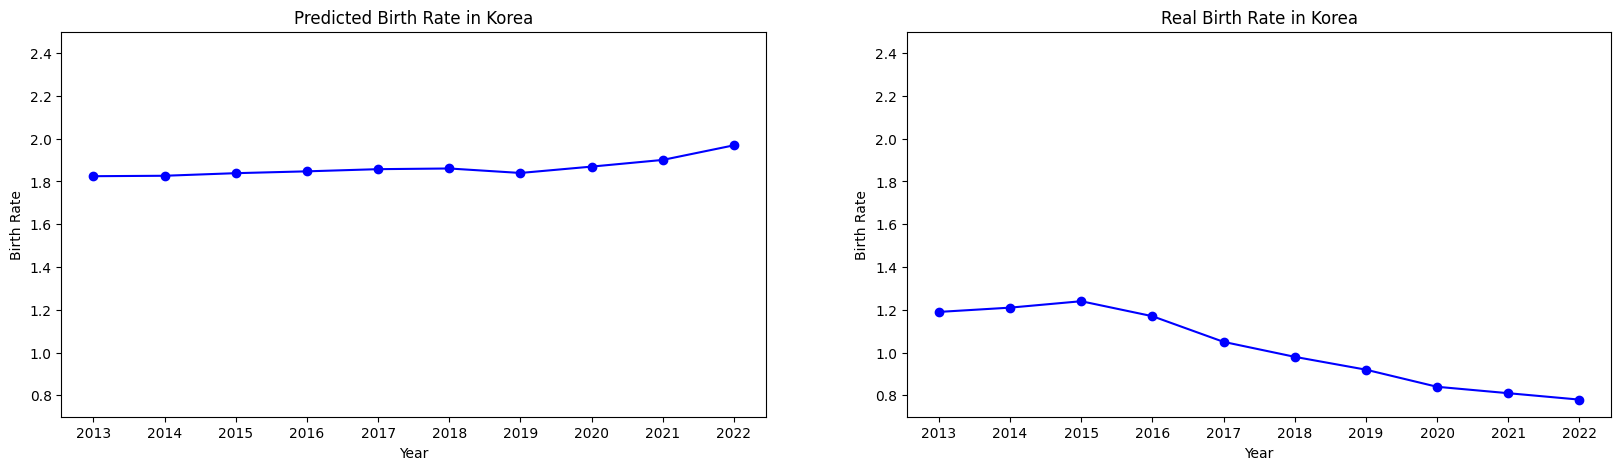

In [40]:
# 그래프 생성
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2013, 2023), birth_rate_korea_pred, marker='o', linestyle='-', color='b', label='Birth Rate Prediction')

# 그래프 제목 추가
plt.title('Predicted Birth Rate in Korea')

# x축, y축 레이블 추가
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.ylim(0.7, 2.5)
plt.xticks(range(2013,2023))

birth_rate_korea_real = [1.19, 1.21, 1.24, 1.17, 1.05, 0.98, 0.92, 0.84, 0.81, 0.78]

plt.subplot(1, 2, 2)
plt.title('Real Birth Rate in Korea')
plt.plot(range(2013, 2023), birth_rate_korea_real, marker='o', linestyle='-', color='b', label='Birth Rate Prediction')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.ylim(0.7, 2.5)
plt.xticks(range(2013,2023))
plt.show()